<a href="https://colab.research.google.com/github/shivakshisharma/SIP_Metallisation_Project/blob/main/SIP_project_Metallisation_V1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
from matplotlib.pyplot import subplots

In [ ]:
df = pd.read_excel('SIP_project.xlsx',engine='openpyxl')

In [ ]:
df.columns

In [ ]:
output_df=df[['% C', '% S', '% T. Fe', '% M. Fe']]

In [ ]:
columns_to_drop = ['% C', '% S', '% T. Fe', '% M. Fe']
df = df.drop(columns_to_drop, axis=1)

In [ ]:
output_df.head()

In [ ]:
df.to_excel('output_df.xlsx', index=False)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:

# Replace 0 values with NaN for columns 41 onwards
df.iloc[:, 41:] = df.iloc[:, 41:].mask(df.iloc[:, 41:] == 0, np.nan)

# Drop rows containing NaN values in columns 41 onwards
df.dropna(subset=df.columns[41:], inplace=True)


In [ ]:
df['Sp heat'] = pd.to_numeric(df['Sp heat'], errors='coerce')

In [ ]:
df['F/C#3'] = pd.to_numeric(df['F/C#3'], errors='coerce')

In [ ]:
df['F/C#4'] = pd.to_numeric(df['F/C#4'], errors='coerce')

In [ ]:
df['F/C#10'] = pd.to_numeric(df['F/C#10'], errors='coerce')

In [ ]:
print(df['Sp heat'].dtype)

float64


In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df2=df.iloc[:,0:10]
df3=df.iloc[:,10:20]
df4=df.iloc[:,20:29]
df5=df.iloc[:,30:42]
df6=df.iloc[:,42:46]

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df2)

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df3)

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df4)

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df5)

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df6)

In [ ]:
sp_heat=df['Sp heat']
sp_heat

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(data=sp_heat)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
df1=sc.fit_transform(df)

In [ ]:
df1=pd.DataFrame(df1)

In [ ]:
df1.describe()

In [ ]:
df.shape


In [ ]:
new_df=df.copy()
for i in range(df.shape[1]):
    mean = statistics.mean(new_df.iloc[:, i])
    stdv = statistics.stdev(new_df.iloc[:, i])
    ucl = mean + 3 * stdv
    lcl = mean - 3 * stdv
    outlier_indices = new_df[(new_df.iloc[:, i] < lcl) | (new_df.iloc[:, i] > ucl)].index
    new_df = new_df.drop(outlier_indices)

In [ ]:
new_df.shape

In [ ]:
new_df2=new_df.iloc[:,0:10]
new_df3=new_df.iloc[:,10:20]
new_df4=new_df.iloc[:,20:29]
new_df5=new_df.iloc[:,30:42]
new_df6=new_df.iloc[:,41:46]

In [ ]:
new_df.describe()

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=new_df2)

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=new_df3)

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=new_df4)

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=new_df5)

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=new_df6)

In [ ]:
corr=new_df.corr()

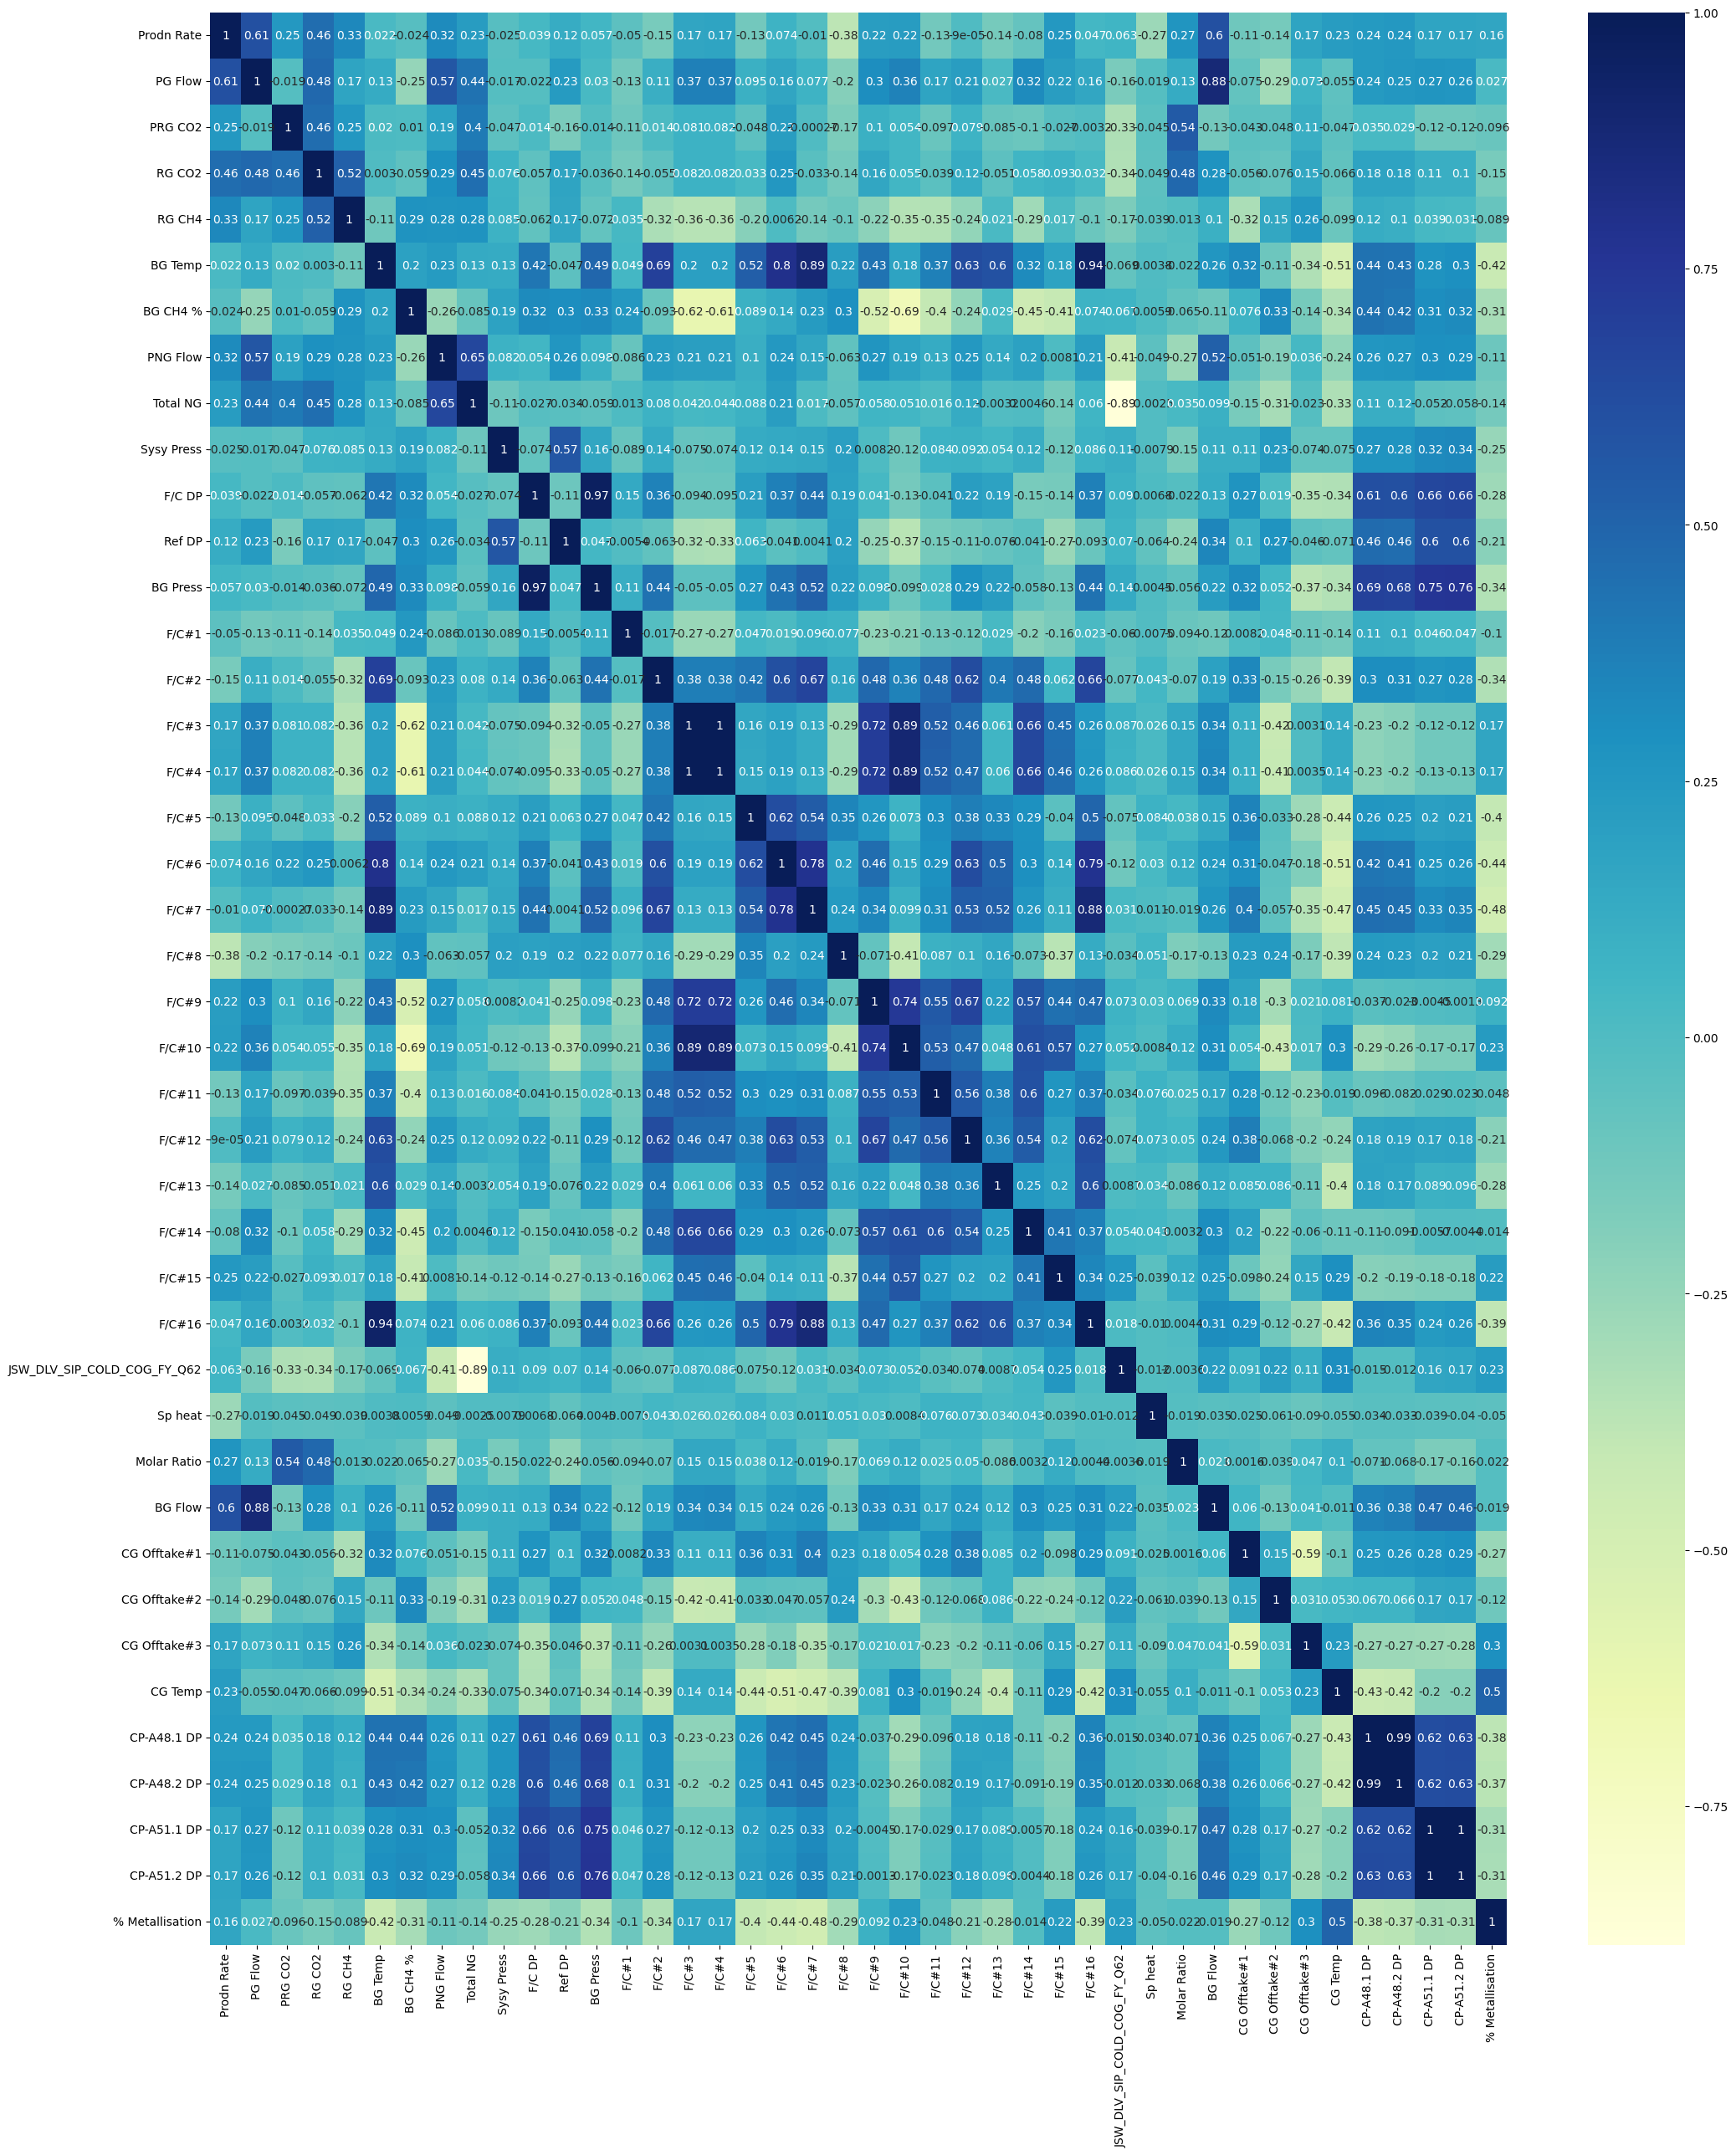

In [ ]:
plt.figure(figsize=(25,30))
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [ ]:
df1 = pd.DataFrame()

# Calculate correlation with '% Metallisation' column
corr_with_metallisation = df.corrwith(df['% Metallisation'])

# Iterate over the correlation values
for column, correlation in corr_with_metallisation.items():
    # Check if correlation is greater than or equal to 0.4
    if abs(correlation) >= 0.15:
        # Add the column to df1
        df1[column] = df[column]

# Concatenate df1 with the '% Metallisation' column
df1['% Metallisation'] = df['% Metallisation']

# Create pair plots
sns.pairplot(df1)
plt.show()

In [ ]:
corr1=df[['Prodn Rate', 'PG Flow', 'PRG CO2', 'RG CO2', 'RG CH4', 'BG Temp','% Metallisation']]
corr2=df[['BG CH4 %', 'PNG Flow', 'Total NG', 'Sysy Press', 'F/C DP', 'Ref DP','% Metallisation']]
corr3=df[['BG Press', 'F/C#1', 'F/C#2', 'F/C#3', 'F/C#4', 'F/C#5', 'F/C#6','% Metallisation']]
corr4=df[['F/C#7', 'F/C#8', 'F/C#9', 'F/C#10', 'F/C#11', 'F/C#12', 'F/C#13','% Metallisation']]
corr5=df[['Molar Ratio', 'BG Flow', 'CG Offtake#1', 'CG Offtake#2','% Metallisation']]
corr6=df[[ 'CG Offtake#3', 'CG Temp', 'CP-A48.1 DP', 'CP-A48.2 DP', 'CP-A51.1 DP','% Metallisation']]
corr7=df[['CP-A51.2 DP','% Metallisation']]

In [ ]:
df.columns

In [ ]:
sns.pairplot(corr1)

In [ ]:
sns.pairplot(corr2)

In [ ]:
df.columns

In [ ]:
from scipy.stats import pearsonr

# Assuming 'df' is your dataframe containing the data
# 'Metallisation' is your dependent variable, and other columns are independent variables

# Calculate Pearson correlation coefficient and p-value for each independent variable
correlation_results = {}
for column in df.columns:
    if column != ' % Metallisation':
        correlation_coefficient, p_value = pearsonr(df[column], df['% Metallisation'])
        correlation_results[column] = {'Correlation Coefficient': correlation_coefficient, 'p-value': p_value}

# Print the results
for column, result in correlation_results.items():
    print(f"{column}: Correlation Coefficient = {result['Correlation Coefficient']}, p-value = {result['p-value']}")


OLS method to check the p-value in order to finf the non linear correlations

In [ ]:
import statsmodels.api as sm
def ols(y,x):
  model_sm ='NULL'
  model_sm = sm.OLS(y,x) # Ordinary Least Square
  fii = model_sm.fit()
  p_values = fii.summary2().tables[1]['P>|t|']
  print(fii.summary())

y=new_df[['% Metallisation']]
x=new_df.iloc[:,0:41]
ols(y,x)

                                 OLS Regression Results                                
Dep. Variable:        % Metallisation   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.504e+06
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                        10:40:25   Log-Likelihood:                         -2101.0
No. Observations:                2440   AIC:                                      4284.
Df Residuals:                    2399   BIC:                                      4522.
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for independent variables
X = new_df.iloc[:,0:41]

# Compute VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                       Variable           VIF
0                    Prodn Rate  3.313095e+03
1                       PG Flow  7.723656e+04
2                       PRG CO2  2.610542e+03
3                        RG CO2  9.010900e+02
4                        RG CH4  9.792414e+01
5                       BG Temp  4.338704e+04
6                      BG CH4 %  4.571964e+02
7                      PNG Flow  7.661048e+03
8                      Total NG  6.309601e+03
9                    Sysy Press  5.249324e+04
10                       F/C DP  4.619398e+05
11                       Ref DP  3.929354e+04
12                     BG Press  1.481736e+06
13                        F/C#1  7.365360e+00
14                        F/C#2  9.624615e+02
15                        F/C#3  8.901227e+02
16                        F/C#4  8.544934e+02
17                        F/C#5  1.675569e+03
18                        F/C#6  2.547257e+04
19                        F/C#7  1.150350e+04
20                        F/C#8  2

Variables with high VIF values:

BG Press, F/C DP, CP-A48.1 DP, CP-A48.2 DP, CP-A51.1 DP, and CP-A51.2 DP have extremely high VIF values, indicating severe multicollinearity issues. This suggests that these variables are highly correlated with other independent variables in the dataset.
PG Flow, BG Flow, Sysy Press, and JSW_DLV_SIP_COLD_COG_FY_Q62 also have relatively high VIF values, indicating potential multicollinearity concerns.
Variables with moderate VIF values:

PRG CO2, BG Temp, PNG Flow, Total NG, and Ref DP have moderate VIF values, suggesting some degree of multicollinearity.
Variables with low VIF values:

Variables such as Sp heat, Molar Ratio, F/C#1, F/C#2, ..., F/C#16, CG Offtake#1, CG Offtake#2, CG Offtake#3, CG Temp, and RG CO2 have relatively low VIF values, indicating lower levels of multicollinearity.

Explained Variance Ratio:
PC1: 0.219
PC2: 0.172
PC3: 0.102
PC4: 0.077
PC5: 0.053
PC6: 0.045
PC7: 0.041
PC8: 0.027
PC9: 0.026
PC10: 0.022
PC11: 0.022
PC12: 0.019
PC13: 0.018
PC14: 0.016
PC15: 0.015
PC16: 0.013
PC17: 0.012
PC18: 0.012
PC19: 0.011
PC20: 0.010
PC21: 0.009
PC22: 0.008
PC23: 0.007
PC24: 0.007
PC25: 0.006
PC26: 0.005
PC27: 0.004
PC28: 0.004
PC29: 0.004
PC30: 0.003
PC31: 0.002
PC32: 0.002
PC33: 0.002
PC34: 0.001
PC35: 0.001
PC36: 0.001
PC37: 0.000
PC38: 0.000
PC39: 0.000
PC40: 0.000
PC41: 0.000
PC42: 0.000


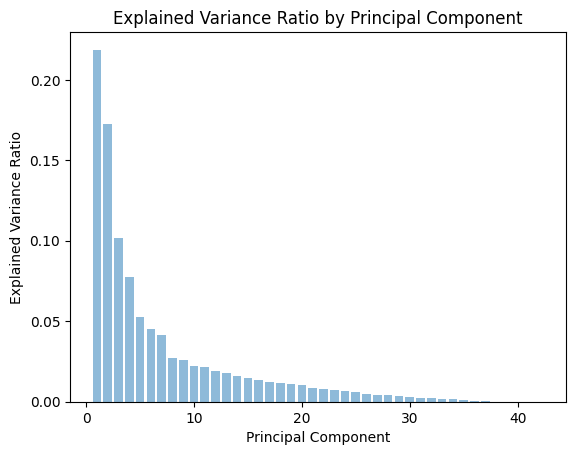

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Assuming you have a DataFrame named df containing your data

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)

# Step 2: Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Step 3: Get the principal components
principal_components = pca.transform(scaled_data)

# Step 4: Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Step 5: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.3f}")

# Optionally, you can also visualize the explained variance ratio
import matplotlib.pyplot as plt
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your dataframe containing the data
# 'Metallisation' is your dependent variable, and other columns are independent variables

# Prepare the independent variables (X) and dependent variable (Y)
X = df.drop(columns=['% Metallisation'])  # Independent variables
Y = df['% Metallisation']  # Dependent variable

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X, Y)

# Print the coefficients of the model
print("Coefficients:")
for i, column in enumerate(X.columns):
    print(f"{column}: {model.coef_[i]}")

# Print the intercept
print("Intercept:", model.intercept_)


Coefficients:
Prodn Rate: -0.0002180624452178318
PG Flow: 0.16551237965253152
PRG CO2: -0.028723126590013835
RG CO2: -0.013121618136688518
RG CH4: -0.35669487075347406
BG Temp: -0.00024978467166722636
BG CH4 %: 0.2940558300273409
PNG Flow: 0.1563749307484344
Total NG: 0.08020377462794195
Sysy Press: 4.833270781607054e-05
F/C DP: 2.721560304860542
Ref DP: -2.220369138453473
BG Press: -2.172670934213373
F/C#1: 3.1041049812617305e-05
F/C#2: -0.0009527026270259018
F/C#3: -0.005091887616924315
F/C#4: 0.004869953226620812
F/C#5: -0.0006796343884929885
F/C#6: -0.0021511476603324406
F/C#7: -0.0011646300974243354
F/C#8: -0.001008248009223107
F/C#9: 0.0068831126630553114
F/C#10: 0.00019012854267079314
F/C#11: 0.002046237446320513
F/C#12: -0.002278622154030554
F/C#13: 0.0011678116341120497
F/C#14: -0.00034093982371609946
F/C#15: 0.0007844180262383518
F/C#16: -0.0030001096212540317
JSW_DLV_SIP_COLD_COG_FY_Q62: 0.00012824435868897944
Sp heat: -0.0003532179443523206
Molar Ratio: 0.006755682027801126

In [ ]:
FC_data=new_df[['Prodn Rate','F/C#1', 'F/C#2', 'F/C#3', 'F/C#4', 'F/C#5', 'F/C#6',
       'F/C#7', 'F/C#8', 'F/C#9', 'F/C#10', 'F/C#11', 'F/C#12', 'F/C#13',
       'F/C#14', 'F/C#15', 'F/C#16','% Metallisation']]
FC_data.head()

,Prodn Rate,F/C#1,F/C#2,F/C#3,F/C#4,F/C#5,F/C#6,F/C#7,F/C#8,F/C#9,F/C#10,F/C#11,F/C#12,F/C#13,F/C#14,F/C#15,F/C#16,% Metallisation
24,168.265869,265.153820,599.020880,676.225284,683.876442,691.031795,778.907223,844.548643,672.370185,782.856796,825.940447,725.787215,787.194296,833.183500,759.417171,802.143655,852.412078,92.045257
25,169.891682,370.804708,647.320813,675.758511,617.242556,686.640064,778.788488,836.838187,673.089488,781.729596,817.475856,726.531481,789.824561,826.149076,752.667979,801.325299,851.446470,91.879296
26,169.949935,276.248922,692.373582,739.821473,652.733729,694.625177,776.923759,840.069153,668.208913,780.425573,814.249382,727.779369,788.069174,829.613841,755.296099,804.119144,853.485586,91.879296
27,169.878729,459.844240,711.588213,771.072497,684.972142,691.354448,783.024281,845.840238,669.365851,785.964066,817.443955,722.436755,789.462246,831.586948,760.601027,809.513730,853.080589,92.183854
32,172.415807,333.968619,764.164294,793.400442,754.157889,692.932064,782.837527,835.407412,673.080786,780.740289,821.354244,719.013655,792.360147,829.986813,754.710959,799.062551,853.648871,91.865166


In [ ]:
FC_data.isna().sum()

Prodn Rate         0
F/C#1              0
F/C#2              0
F/C#3              0
F/C#4              0
F/C#5              0
F/C#6              0
F/C#7              0
F/C#8              0
F/C#9              0
F/C#10             0
F/C#11             0
F/C#12             0
F/C#13             0
F/C#14             0
F/C#15             0
F/C#16             0
% Metallisation    0
dtype: int64

In [ ]:
FC_data.describe()

,Prodn Rate,F/C#1,F/C#2,F/C#3,F/C#4,F/C#5,F/C#6,F/C#7,F/C#8,F/C#9,F/C#10,F/C#11,F/C#12,F/C#13,F/C#14,F/C#15,F/C#16,% Metallisation
count,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000
mean,170.341831,415.013103,728.360319,190.046725,186.246192,684.859720,784.948627,850.636526,679.161636,773.938437,227.502188,693.158486,782.462854,827.660913,721.946966,802.565718,861.648983,91.778867
std,6.715398,183.376533,45.715589,343.415449,336.985961,26.186091,12.312600,22.487119,19.413024,11.023986,366.529089,19.270549,12.433574,12.212606,29.189946,14.555612,14.159196,0.605061
min,130.729492,-0.949405,599.020880,0.000000,0.000000,564.085446,744.136742,789.079652,588.317703,739.697083,0.000000,624.542531,743.151527,790.950478,633.344944,759.125286,824.668374,89.333177
25%,165.070130,299.958023,687.979319,0.000000,0.000000,664.925611,774.859529,832.466033,670.787003,765.809679,0.000000,679.099654,773.071642,819.356959,699.835317,791.829446,849.727392,91.603779
50%,170.869311,467.108426,736.149357,0.000000,0.000000,683.573640,785.631288,847.127897,678.876504,772.194834,0.000000,692.560479,781.828419,827.551257,719.942872,802.150965,861.956848,92.036538
75%,175.015865,518.568417,771.710652,0.000000,0.000000,704.089982,794.239200,869.913795,689.768346,782.075361,798.322113,706.369538,790.692851,835.917045,743.350859,812.648599,874.276352,92.158869
max,188.304804,957.465694,801.887226,838.112539,839.531027,763.600284,823.153961,905.511053,761.944562,806.681416,846.869633,761.019285,821.160749,863.195896,796.688412,845.571812,893.434750,92.636123


In [ ]:
corr1=FC_data.corr()

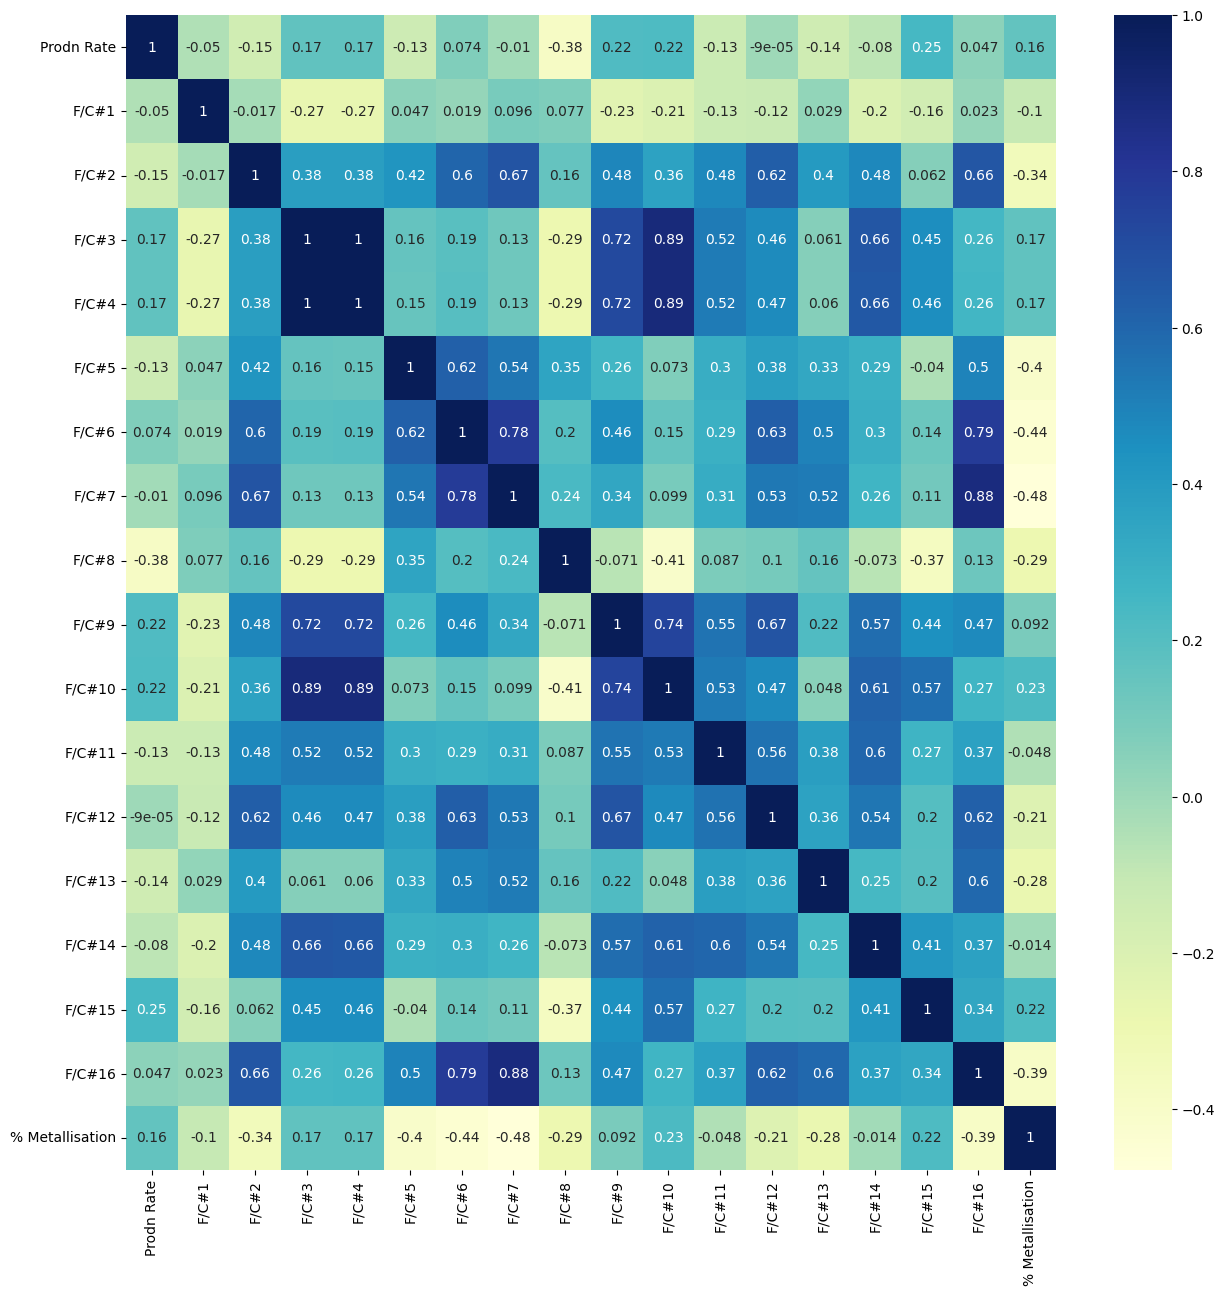

In [ ]:
plt.figure(figsize=(15,15))
dataplot = sns.heatmap(corr1, cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
X=new_df[['CP-A48.1 DP', 'CP-A48.2 DP', 'CP-A51.1 DP',
       'CP-A51.2 DP','F/C#1', 'F/C#2', 'F/C#3', 'F/C#4', 'F/C#5', 'F/C#6',
       'F/C#7', 'F/C#8', 'F/C#9', 'F/C#10', 'F/C#11', 'F/C#12', 'F/C#13',
       'F/C#14', 'F/C#15', 'F/C#16']]
'''Prodn Rate', 'PG Flow', 'BG Temp','PRG CO2', 'RG CO2', 'RG CH4',
       'BG CH4 %', 'PNG Flow', 'Total NG', 'Sysy Press', 'F/C DP', 'Ref DP',
       'BG Press', 'F/C#1', 'F/C#2', 'F/C#3', 'F/C#4', 'F/C#5', 'F/C#6',
       'F/C#7', 'F/C#8', 'F/C#9', 'F/C#10', 'F/C#11', 'F/C#12', 'F/C#13',
       'F/C#14', 'F/C#15', 'F/C#16', 'Sp heat','JSW_DLV_SIP_COLD_COG_FY_Q62',
       'Molar Ratio', 'BG Flow', 'CG Offtake#1', 'CG Offtake#2',
       'CG Offtake#3', 'CG Temp', '''
y=new_df.iloc[:,41:]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
r2_score(pred,y_test)

-2.6353513123121024

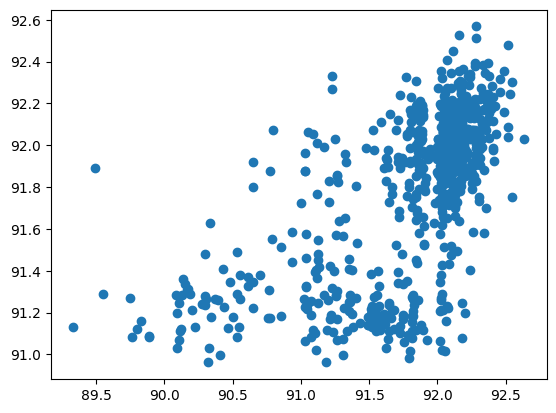

In [ ]:
plt.scatter(y_test,pred)

In [ ]:
new_df.columns

Index(['Prodn Rate', 'PG Flow', 'PRG CO2', 'RG CO2', 'RG CH4', 'BG Temp',
       'BG CH4 %', 'PNG Flow', 'Total NG', 'Sysy Press', 'F/C DP', 'Ref DP',
       'BG Press', 'F/C#1', 'F/C#2', 'F/C#3', 'F/C#4', 'F/C#5', 'F/C#6',
       'F/C#7', 'F/C#8', 'F/C#9', 'F/C#10', 'F/C#11', 'F/C#12', 'F/C#13',
       'F/C#14', 'F/C#15', 'F/C#16', 'JSW_DLV_SIP_COLD_COG_FY_Q62', 'Sp heat',
       'Molar Ratio', 'BG Flow', 'CG Offtake#1', 'CG Offtake#2',
       'CG Offtake#3', 'CG Temp', 'CP-A48.1 DP', 'CP-A48.2 DP', 'CP-A51.1 DP',
       'CP-A51.2 DP', '% Metallisation'],
      dtype='object')

In [ ]:
Press_data=new_df[[]]